In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

In [2]:
output_dir = '/scratch/midway3/jshe/molecular-attention-bias/'

In [3]:
logs = []
models = []

for root, dirs, files in os.walk(output_dir):
    if not files: continue
    *_, model_type, radial_function, architecture, run_id = root.split('/')

    log_file = os.path.join(root, 'log.csv')
    model_file = os.path.join(root, 'model.pt')

    log = pd.read_csv(log_file)
    tuples = [tuple(col.split('_')) for col in log.columns]
    log.columns = pd.MultiIndex.from_tuples(
        tuples,
        names=['split', 'property', 'metric']
    )

    logs.append(log)


## Loss

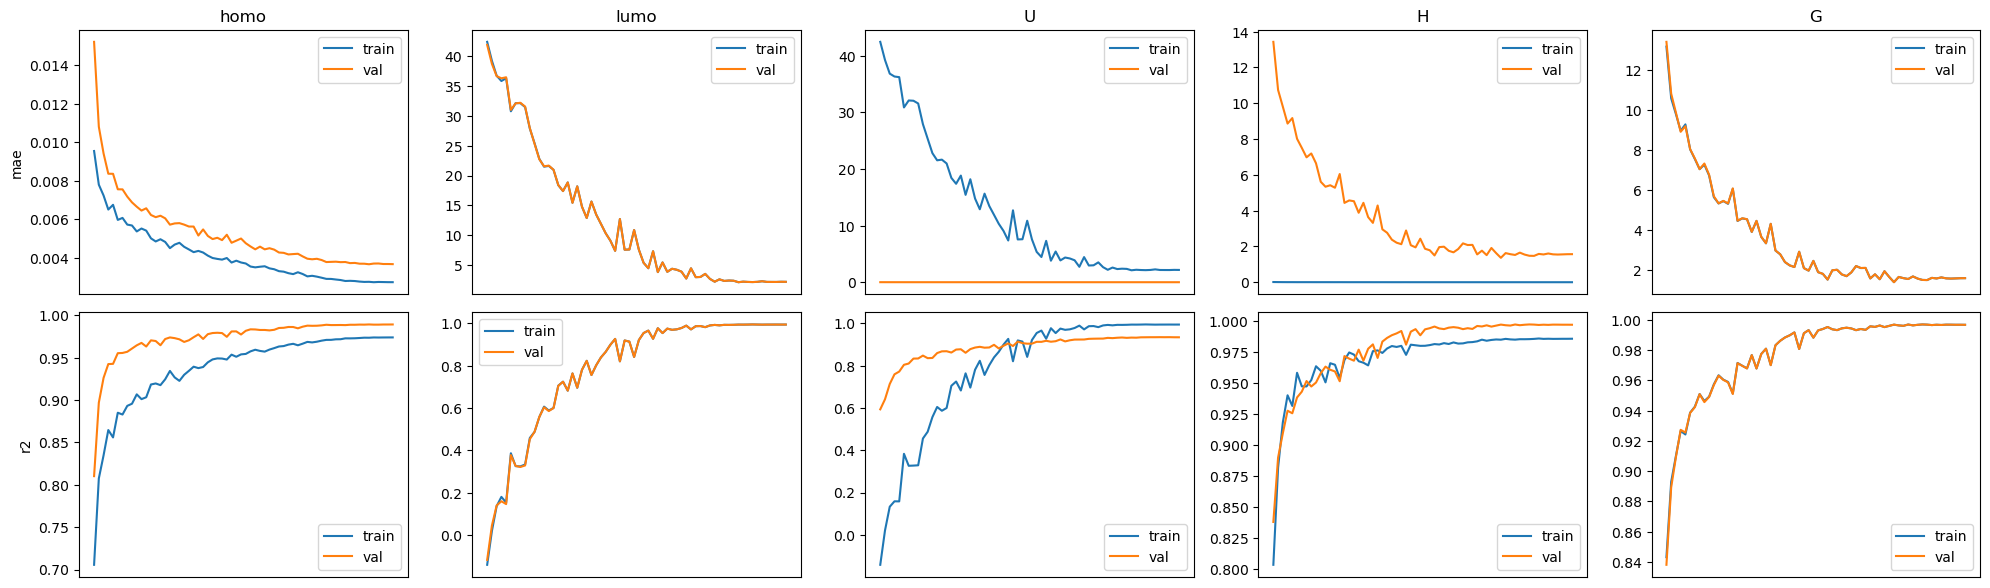

In [4]:
splits = log.columns.get_level_values('split').unique()
properties = log.columns.get_level_values('property').unique()
metrics = log.columns.get_level_values('metric').unique()

fig, axs = plt.subplots(
    len(metrics), len(properties), 
    figsize=(len(properties) * 4, len(metrics) * 3), 
    sharex=True
)

for column, property in enumerate(properties):
    axs[0, column].set_title(property)
    for row, metric in enumerate(metrics):
        axs[row, 0].set_ylabel(metric)
        for split in splits:
            ax = axs[row, column]

            data = log[split, property, metric][:64]
            ax.plot(data, label=split)
            ax.set_xticks([])
            ax.legend()
            if metric == 'mse': ax.set_yscale('log')

fig.tight_layout()